In [5]:
import bpy
import mathutils
from IPython.display import Image, display
from dataclasses import replace, fields
from prettymol import draw, load_pdb,  StructureSelector, Repltools


rt = Repltools()

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
rt = repltools()
rt.clear().get_view()
view = rt.get_view()
mmat = mathutils.Matrix(list(view))    
view

[[-0.2108062505722046,
  -0.24431072175502777,
  0.9465055465698242,
  0.912351131439209],
 [0.9775277376174927,
  -0.052686210721731186,
  0.20411626994609833,
  0.2005273997783661],
 [4.097818262494002e-08,
  0.9682645201683044,
  0.24992717802524567,
  0.24012339115142822],
 [-0.0, 0.0, -0.0, 1.0]]

In [20]:
rt.set_view(view)

In [21]:
# Load and process structure
structure = load_pdb("7xbu")
polymer = StructureSelector(structure).amino_acids().get_selection()
ligand = StructureSelector(structure).resname("MYN").get_selection()

Saved: '/tmp/output.png'
Time: 00:01.72 (Saving: 00:00.13)



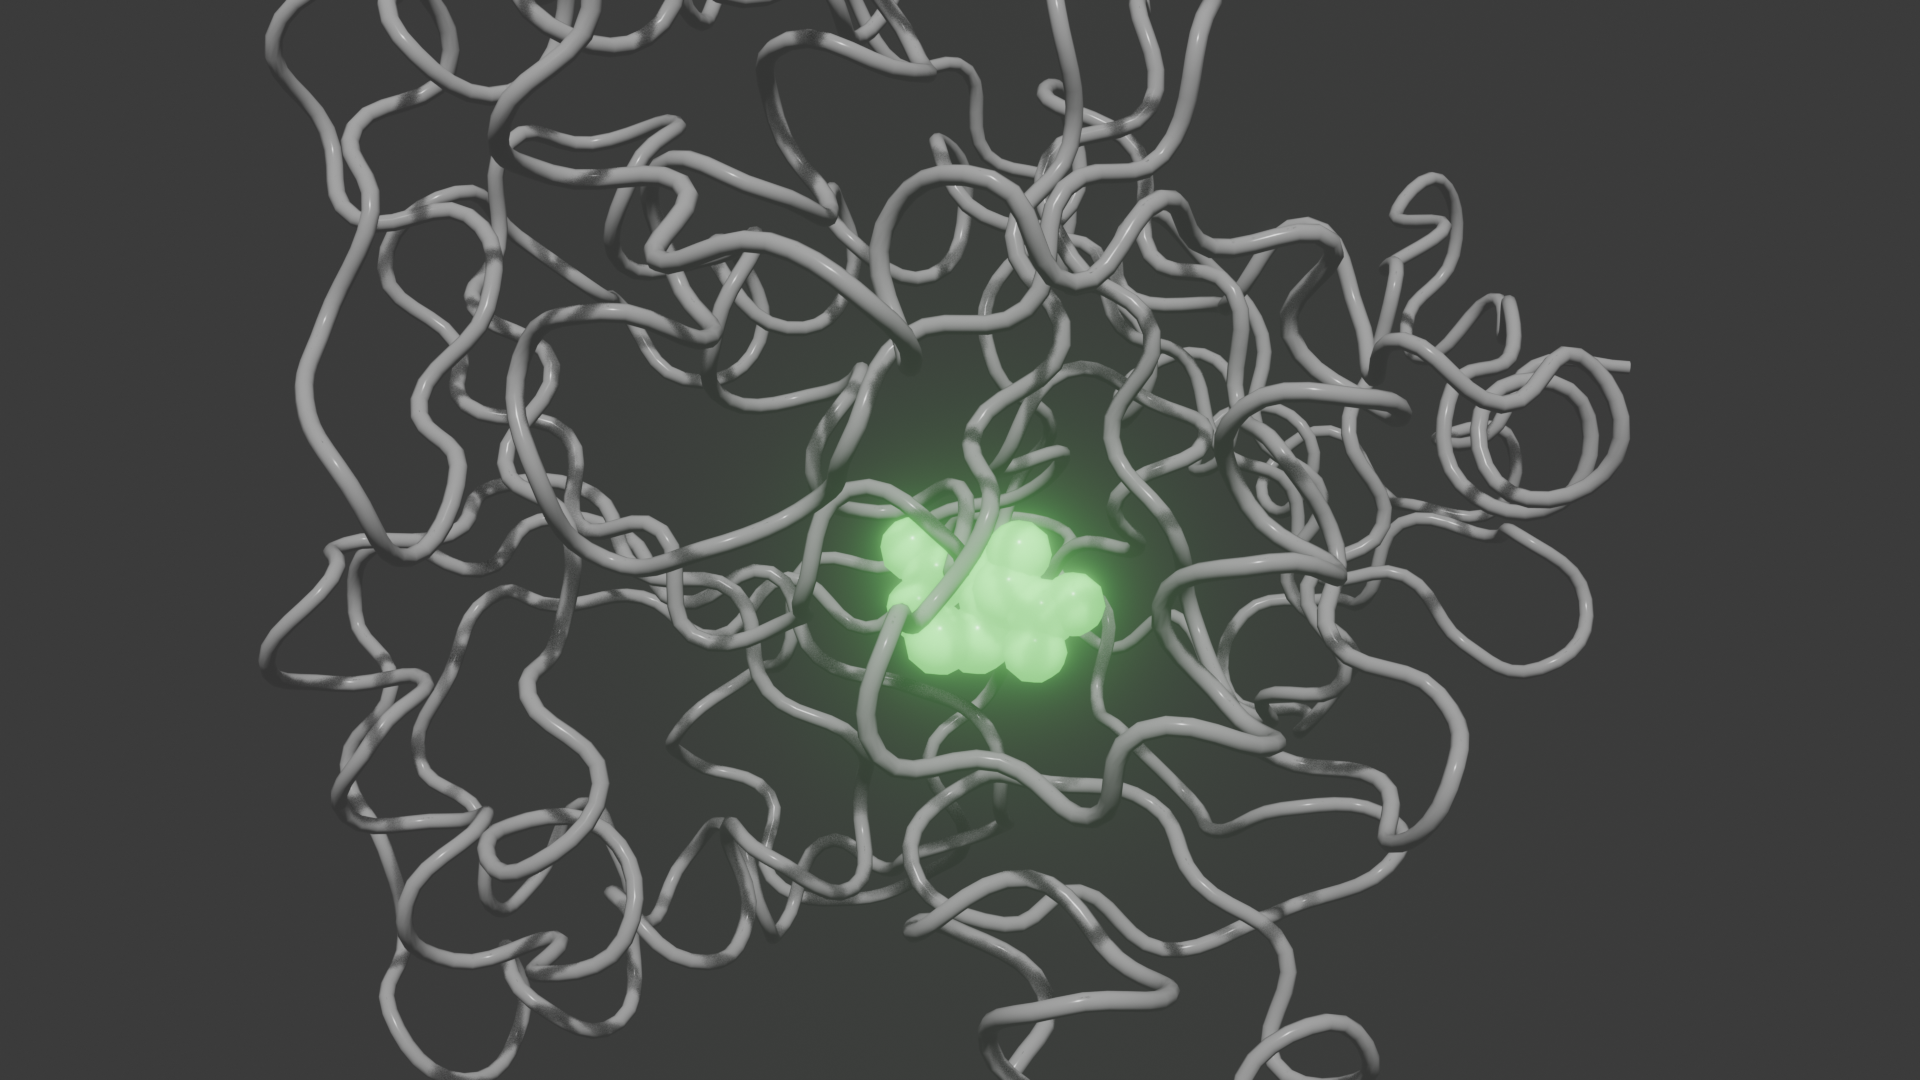

In [27]:
rt.clear()

# Create materials
surface_material =  styles.BSDFPrincipled()
cartoon_material =  styles.BSDFPrincipled()
sticks_material =  replace(
        styles.BSDFPrincipled(),
        **{'base_color': [0.15, 1, 0.15, 1],
           "emission_strength": 1,
           "emission_color": [0.15, 1, 0.15, 1]})

sphere_style =  replace(
        styles.SpheresStyle(),
        **{'as_mesh': True})


# print(sticks_material)
      
# Draw and position
draw(structure, styles.CartoonStyle(), cartoon_material)
draw(ligand, sphere_style, sticks_material)
# draw2(structure, styles.SurfaceStyle(), surface_material)

rt.auto_view()

# Render and view
bpy.context.scene.render.filepath = '/tmp/output.png'
bpy.ops.render.render(use_viewport=True, write_still=True)
display(Image('/tmp/output.png'))